# Introducción a Pandas

Pandas es una de las módulo de python que nos permitirá la manipulación de datos para análisis a través de una estructura flexible y la implementación de funciones estadisticas.

## Instalación

Al igual que cualquier módulo de python podemos instalarlo a través del _anaconda navigator_ o por consola usando:

```bash
conda install pandas
```
o
```bash
pip install pandas
```

Luego bastaria con importarlo en nuestro notebook


In [2]:
import pandas as pd

## Pandas

Utilizar pandas es similitar a trabajar con tablas de datos, donde las columnas serán atributos y las filas son instancias, cada una identificada por un o más índices. Las dos estructuras clave de pandas son las __Series__ y los __DataFrame__. 

### Series

Son arrays unidimensionales con indexación (arrays con índice o etiquetados), similar a los diccionarios. Pueden generarse a partir de diccionarios o de listas.

Para crear una serie

In [11]:
s1 = pd.Series([1,3,5,6,8])
s1

0    1
1    3
2    5
3    6
4    8
dtype: int64

In [14]:
s2 = pd.Series({"a":1,"b":3,"c":5,"d":6,"e":8})
s2

a    1
b    3
c    5
d    6
e    8
dtype: int64

In [9]:
print(s.index)
print("Tamaño",s.size)
print("Tamaño de items",s.itemsize)
print("Tipo de items",s.dtype)

RangeIndex(start=0, stop=5, step=1)
Tamaño 5
Tamaño de items 8
Tipo de items int64


### DataFrame

Son estructuras de datos similares a las tablas de bases de datos relacionales, está conformado por Indices y Series.


Podemos crear DataFrames usando listas o NumPy arrays, indexando con un datetime index y usando columnas con nombre:

In [15]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [18]:
from random import random

datos = []
for i in range(6):
    l = []
    for i in range(4):
        l.append(random())
    datos.append(list(l))
df = pd.DataFrame(datos, index=dates, columns=['A','B','C','D'])
df

,A,B,C,D
2013-01-01,0.662911,0.985043,0.543490,0.177695
2013-01-02,0.468931,0.686373,0.949581,0.679130
2013-01-03,0.345177,0.832014,0.533394,0.434600
2013-01-04,0.984411,0.202543,0.174618,0.550931
2013-01-05,0.328239,0.065804,0.172259,0.474877
2013-01-06,0.347680,0.414488,0.145131,0.275529


O podemos crearlo usando un diccionario de objetos con los que se puedan construir Series

In [20]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : [random() for i in range(4)],
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' 
                   })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,0.323022,test,foo
1,1.0,2013-01-02,1.0,0.200092,train,foo
2,1.0,2013-01-02,1.0,0.150631,test,foo
3,1.0,2013-01-02,1.0,0.723615,train,foo


In [21]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D           float64
E          category
F            object
dtype: object

In [22]:
df2.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [23]:
df2.index

Int64Index([0, 1, 2, 3], dtype='int64')

Podemos cambiar el índice

In [25]:
df2 = df2.set_index("B")
df2

,A,C,D,E,F
B,,,,,
2013-01-02,1.0,1.0,0.323022,test,foo
2013-01-02,1.0,1.0,0.200092,train,foo
2013-01-02,1.0,1.0,0.150631,test,foo
2013-01-02,1.0,1.0,0.723615,train,foo


O bien podemos cargar un _DataFrame_ desde un archivo _csv_ o _excel_.


In [98]:
df3 = pd.read_csv("./src/NFLX.csv")
#df3 = pd.read_excel("excel filepath")
df3.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-19,315.799988,317.000000,307.339996,313.480011,313.480011,9925200
1,2018-03-20,313.260010,319.500000,312.799988,317.500000,317.500000,5991900
2,2018-03-21,316.350006,319.399994,314.510010,316.480011,316.480011,5263900
3,2018-03-22,313.070007,314.119995,305.660004,306.700012,306.700012,8063300
4,2018-03-23,307.410004,309.369995,300.359985,300.940002,300.940002,9529900


### Mostrar contenido

Podemos mostrar los primeros y últimos elementos del DataFrame

In [27]:
df.head(2)

,A,B,C,D
2013-01-01,0.662911,0.985043,0.543490,0.177695
2013-01-02,0.468931,0.686373,0.949581,0.679130


In [29]:
df.tail(2)

,A,B,C,D
2013-01-05,0.328239,0.065804,0.172259,0.474877
2013-01-06,0.347680,0.414488,0.145131,0.275529


Mostrar los índices, columnas y valores

In [30]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [31]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [32]:
df.values

array([[0.6629115 , 0.98504316, 0.54348959, 0.17769545],
       [0.46893061, 0.68637326, 0.94958058, 0.67912982],
       [0.34517741, 0.83201413, 0.53339418, 0.43460038],
       [0.98441107, 0.2025429 , 0.1746181 , 0.55093104],
       [0.32823869, 0.06580382, 0.17225882, 0.47487703],
       [0.34767981, 0.41448847, 0.14513083, 0.27552893]])

Mostrar estadísticas de los datos

In [33]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.522892,0.531044,0.419745,0.432127
std,0.259110,0.362980,0.318026,0.182328
min,0.328239,0.065804,0.145131,0.177695
25%,0.345803,0.255529,0.172849,0.315297
50%,0.408305,0.550431,0.354006,0.454739
75%,0.614416,0.795604,0.540966,0.531918
max,0.984411,0.985043,0.949581,0.679130


Transponer los datos


In [34]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.662911,0.468931,0.345177,0.984411,0.328239,0.347680
B,0.985043,0.686373,0.832014,0.202543,0.065804,0.414488
C,0.543490,0.949581,0.533394,0.174618,0.172259,0.145131
D,0.177695,0.679130,0.434600,0.550931,0.474877,0.275529


Ordenar por índice

In [37]:
df.sort_index(ascending=False)

,A,B,C,D
2013-01-06,0.347680,0.414488,0.145131,0.275529
2013-01-05,0.328239,0.065804,0.172259,0.474877
2013-01-04,0.984411,0.202543,0.174618,0.550931
2013-01-03,0.345177,0.832014,0.533394,0.434600
2013-01-02,0.468931,0.686373,0.949581,0.679130
2013-01-01,0.662911,0.985043,0.543490,0.177695


Ordenar por valor

In [38]:
df.sort_values(by="C")

,A,B,C,D
2013-01-06,0.347680,0.414488,0.145131,0.275529
2013-01-05,0.328239,0.065804,0.172259,0.474877
2013-01-04,0.984411,0.202543,0.174618,0.550931
2013-01-03,0.345177,0.832014,0.533394,0.434600
2013-01-01,0.662911,0.985043,0.543490,0.177695
2013-01-02,0.468931,0.686373,0.949581,0.679130


### Seleccionando valores

Obtener una columna

In [39]:
df["A"]

2013-01-01    0.662911
2013-01-02    0.468931
2013-01-03    0.345177
2013-01-04    0.984411
2013-01-05    0.328239
2013-01-06    0.347680
Freq: D, Name: A, dtype: float64

In [40]:
df.A

2013-01-01    0.662911
2013-01-02    0.468931
2013-01-03    0.345177
2013-01-04    0.984411
2013-01-05    0.328239
2013-01-06    0.347680
Freq: D, Name: A, dtype: float64

#### Seleccionar por índices

In [41]:
df[0:3]

,A,B,C,D
2013-01-01,0.662911,0.985043,0.543490,0.177695
2013-01-02,0.468931,0.686373,0.949581,0.679130
2013-01-03,0.345177,0.832014,0.533394,0.434600


In [43]:
df['20130103':'20130105']

,A,B,C,D
2013-01-03,0.345177,0.832014,0.533394,0.434600
2013-01-04,0.984411,0.202543,0.174618,0.550931
2013-01-05,0.328239,0.065804,0.172259,0.474877


In [44]:
df.A['20130102':'20130104']

2013-01-02    0.468931
2013-01-03    0.345177
2013-01-04    0.984411
Freq: D, Name: A, dtype: float64

#### Seleccionando por labels

In [47]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.468931,0.686373
2013-01-03,0.345177,0.832014
2013-01-04,0.984411,0.202543


In [48]:
df.loc['20130102',['A','B']]

A    0.468931
B    0.686373
Name: 2013-01-02 00:00:00, dtype: float64

In [49]:
df.loc[dates[0],'A']

0.6629114984427661

In [50]:
df.at[dates[0],'A']

0.6629114984427661

#### Seleccionando por posición

In [51]:
df.iloc[3]

A    0.984411
B    0.202543
C    0.174618
D    0.550931
Name: 2013-01-04 00:00:00, dtype: float64

In [53]:
df.iloc[3:5,1:3]

,B,C
2013-01-04,0.202543,0.174618
2013-01-05,0.065804,0.172259


In [54]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.468931,0.949581
2013-01-03,0.345177,0.533394
2013-01-05,0.328239,0.172259


In [55]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.468931,0.686373,0.949581,0.67913
2013-01-03,0.345177,0.832014,0.533394,0.43460


In [56]:
df.iloc[1,1]

0.6863732646880161

In [57]:
df.iat[1,1]

0.6863732646880161

#### Por condiciones

In [61]:
df[df > 0.3]

,A,B,C,D
2013-01-01,0.662911,0.985043,0.543490,NaN
2013-01-02,0.468931,0.686373,0.949581,0.679130
2013-01-03,0.345177,0.832014,0.533394,0.434600
2013-01-04,0.984411,NaN,NaN,0.550931
2013-01-05,0.328239,NaN,NaN,0.474877
2013-01-06,0.347680,0.414488,NaN,NaN


In [60]:
df[df.A > 0.4]

,A,B,C,D
2013-01-01,0.662911,0.985043,0.543490,0.177695
2013-01-02,0.468931,0.686373,0.949581,0.679130
2013-01-04,0.984411,0.202543,0.174618,0.550931


### Asignando valores

In [70]:
df.B = pd.Series([0,1,1,0,None,1], index=pd.date_range('20130101', periods=6))

df.at[dates[2], "A"] = None

df.iat[0,3] = None

df

,A,B,C,D
2013-01-01,-1.000000,0.0,0.543490,NaN
2013-01-02,0.468931,1.0,0.949581,0.679130
2013-01-03,NaN,1.0,0.533394,0.434600
2013-01-04,0.984411,0.0,0.174618,0.550931
2013-01-05,0.328239,NaN,0.172259,0.474877
2013-01-06,0.347680,1.0,0.145131,0.275529


### Datos perdidos




In [76]:
pd.isna(df)

,A,B,C,D
2013-01-01,False,False,False,True
2013-01-02,False,False,False,False
2013-01-03,True,False,False,False
2013-01-04,False,False,False,False
2013-01-05,False,True,False,False
2013-01-06,False,False,False,False


In [73]:
df.dropna(how='any')

,A,B,C,D
2013-01-02,0.468931,1.0,0.949581,0.679130
2013-01-04,0.984411,0.0,0.174618,0.550931
2013-01-06,0.347680,1.0,0.145131,0.275529


In [75]:
df.fillna(value=5)

,A,B,C,D
2013-01-01,-1.000000,0.0,0.543490,5.000000
2013-01-02,0.468931,1.0,0.949581,0.679130
2013-01-03,5.000000,1.0,0.533394,0.434600
2013-01-04,0.984411,0.0,0.174618,0.550931
2013-01-05,0.328239,5.0,0.172259,0.474877
2013-01-06,0.347680,1.0,0.145131,0.275529


### Estadisticas

In [79]:
df.mean(axis=0)

A    0.225852
B    0.600000
C    0.419745
D    0.483013
dtype: float64

In [80]:
df.mean(axis=1)

2013-01-01   -0.152170
2013-01-02    0.774410
2013-01-03    0.655998
2013-01-04    0.427490
2013-01-05    0.325125
2013-01-06    0.442085
Freq: D, dtype: float64

In [82]:
df.max()

A    0.984411
B    1.000000
C    0.949581
D    0.679130
dtype: float64

In [83]:
df.min()

A   -1.000000
B    0.000000
C    0.145131
D    0.275529
dtype: float64

In [84]:
df.median()

A    0.347680
B    1.000000
C    0.354006
D    0.474877
dtype: float64

In [86]:
df.A.value_counts()

 0.468931    1
 0.328239    1
 0.984411    1
 0.347680    1
-1.000000    1
Name: A, dtype: int64

In [87]:
df.sum()

A    1.129260
B    3.000000
C    2.518472
D    2.415067
dtype: float64

In [88]:
df.cumsum()

,A,B,C,D
2013-01-01,-1.000000,0.0,0.543490,NaN
2013-01-02,-0.531069,1.0,1.493070,0.679130
2013-01-03,NaN,2.0,2.026464,1.113730
2013-01-04,0.453342,2.0,2.201082,1.664661
2013-01-05,0.781580,NaN,2.373341,2.139538
2013-01-06,1.129260,3.0,2.518472,2.415067


### Gráficos

In [91]:
import matplotlib.pyplot as plt

%matplotlib inline

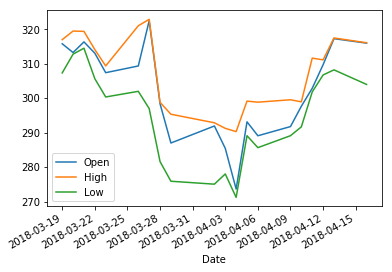

In [114]:
df3 = pd.read_csv("./src/NFLX.csv")

df3.Date = df3.Date.apply(pd.to_datetime)

df3 = df3.set_index("Date")

df3[["Open", "High", "Low"]].plot();

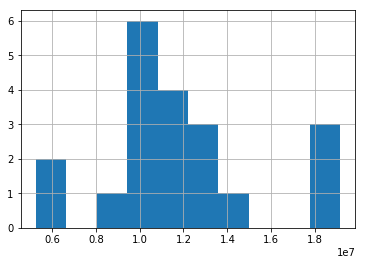

In [117]:
df3["Volume"].hist();